<a href="https://colab.research.google.com/github/nagarajabhishek3/Google-colab-files/blob/main/ARMA_%26_ARIMA_forecast_on_tcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
d = pd.read_csv('/content/tcs_stock_data clean.csv')

In [ ]:
d.head()

,Date,Close,High,Low,Open,Volume
0,01-01-2020,1900.037842,1914.325646,1888.116501,1900.388381,1354908
1,02-01-2020,1891.316162,1910.863561,1883.909247,1910.863561,2380752
2,03-01-2020,1929.008057,1948.599323,1896.882112,1896.882112,4655761
3,06-01-2020,1928.832397,1951.184747,1917.831493,1932.820801,3023209
4,07-01-2020,1933.566406,1941.279989,1914.238151,1928.876709,2429317


Forecast Close Price for next 5 days
1. check for components of time series - plotting line graph of close price column

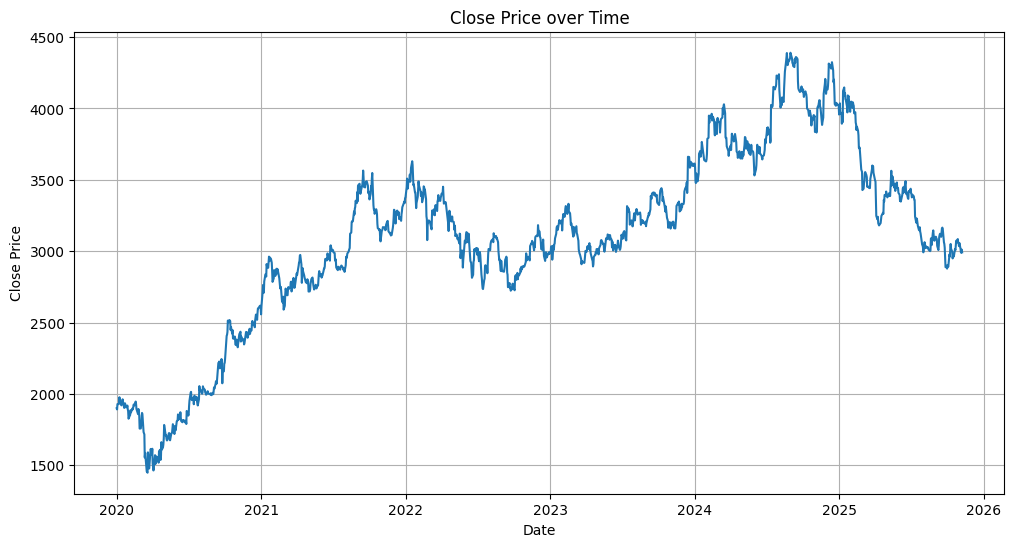

In [ ]:
import matplotlib.pyplot as plt

d['Date'] = pd.to_datetime(d['Date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
plt.plot(d['Date'], d['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price over Time')
plt.grid(True)
plt.show()

the graph shows irregularity but still to check the presence of trend, seasonality, we need to decompose the data
Check for stationarity using ADF test

# Task
Perform time series decomposition on the 'Close' price column of the `d` DataFrame, assuming a weekly seasonality (period=7), and then plot the original series along with its trend, seasonal, and residual components.

## Perform Time Series Decomposition

### Subtask:
Decompose the 'Close' price column using seasonal_decompose to extract trend, seasonal, and residual components.


**Reasoning**:
To decompose the 'Close' price column, I need to import the `seasonal_decompose` function, set the 'Date' column as the DataFrame index, and then apply the decomposition with a weekly period.



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

d_indexed = d.set_index('Date')

decomposition_results = seasonal_decompose(d_indexed['Close'], model='additive', period=7)

print("Time series decomposition completed successfully.")

Time series decomposition completed successfully.


**Reasoning**:
Now that the time series decomposition is complete, the next step is to visualize the original series along with its trend, seasonal, and residual components as requested by the main task.



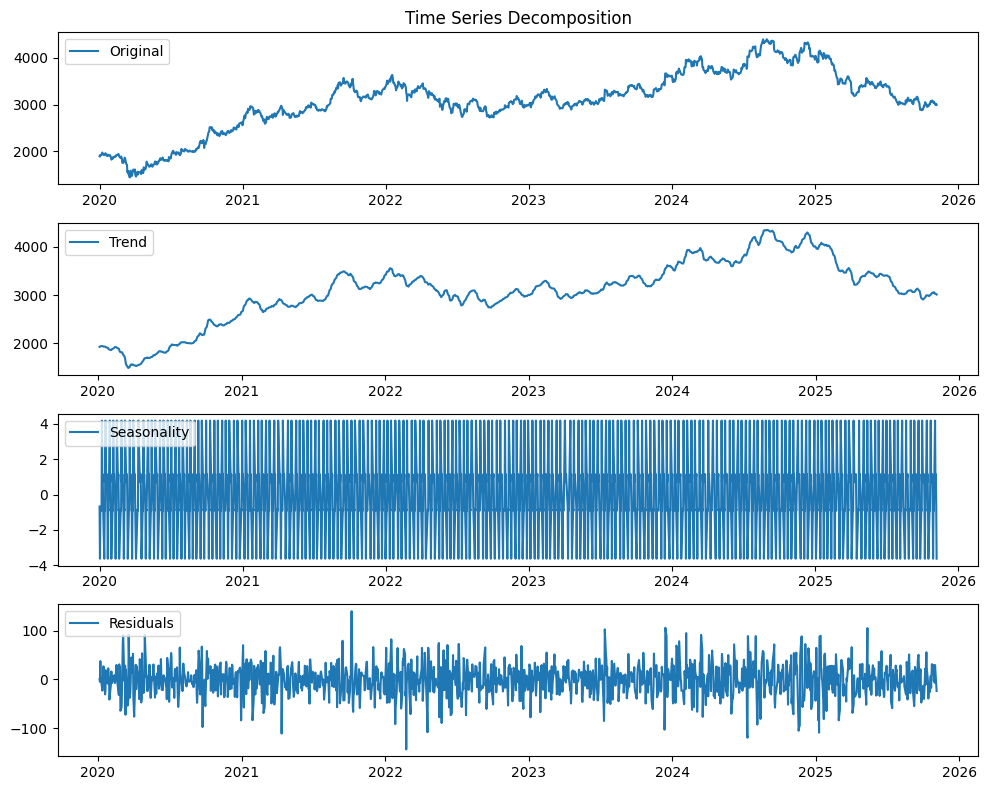

Decomposition components plotted successfully.


In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(d_indexed['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(decomposition_results.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_results.seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_results.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print("Decomposition components plotted successfully.")

## Summary:

### Data Analysis Key Findings
*   Time series decomposition was successfully performed on the 'Close' price column of the `d` DataFrame, utilizing an additive model with a weekly seasonality (period=7).
*   The decomposition process successfully extracted the trend, seasonal, and residual components from the 'Close' price series.
*   The original 'Close' price series and its decomposed components (Trend, Seasonality, and Residuals) were all visualized effectively through individual plots.

### Insights or Next Steps
*   The generated plots provide a clear visual representation of the underlying patterns in the 'Close' price data, allowing for separate analysis of long-term movements (trend), recurring weekly fluctuations (seasonality), and irregular variations (residuals).
*   Further analysis could involve quantitatively assessing the strength of the seasonal component, or performing statistical tests on the residuals to ensure they resemble white noise, indicating a successful decomposition.


The data is not showing any trend or seasonality but the residuals (errors) are constant.
Now check for stationarity, ADF test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

print("Performing Augmented Dickey-Fuller test on 'Close' column...")
adf_test = adfuller(d_indexed['Close'])

print(f"ADF Statistic: {adf_test[0]:.2f}")
print(f"P-value: {adf_test[1]:.2f}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"  {key}: {value:.2f}")

if adf_test[1] < 0.05:
    print("The 'Close' column is stationary (reject H0).")
else:
    print("The 'Close' column is non-stationary (fail to reject H0).")

Performing Augmented Dickey-Fuller test on 'Close' column...
ADF Statistic: -1.98
P-value: 0.30
Critical Values:
  1%: -3.43
  5%: -2.86
  10%: -2.57
The 'Close' column is non-stationary (fail to reject H0).


Close price column is non stationary
1, Take the transformation and check for stationarity , even after the transformation if the data is is likely to be non-stationary then,
2, use first order differentation,

In [ ]:
d_indexed['Close_log'] = np.log(d_indexed['Close'])
print("Log transformation applied to 'Close' column. A new column 'Close_log' has been created.")
d_indexed.head()

Log transformation applied to 'Close' column. A new column 'Close_log' has been created.


,Close,High,Low,Open,Volume,Close_log
Date,,,,,,
2020-01-01,1900.037842,1914.325646,1888.116501,1900.388381,1354908,7.549629
2020-01-02,1891.316162,1910.863561,1883.909247,1910.863561,2380752,7.545028
2020-01-03,1929.008057,1948.599323,1896.882112,1896.882112,4655761,7.564761
2020-01-06,1928.832397,1951.184747,1917.831493,1932.820801,3023209,7.564670
2020-01-07,1933.566406,1941.279989,1914.238151,1928.876709,2429317,7.567121


In [ ]:
from statsmodels.tsa.stattools import adfuller

print("Performing Augmented Dickey-Fuller test on 'Close_log' column...")
adf_test_log = adfuller(d_indexed['Close_log'])

print(f"ADF Statistic (Log): {adf_test_log[0]:.2f}")
print(f"P-value (Log): {adf_test_log[1]:.2f}")
print("Critical Values:")
for key, value in adf_test_log[4].items():
    print(f"  {key}: {value:.2f}")

if adf_test_log[1] < 0.05:
    print("The 'Close_log' column is stationary (reject H0).")
else:
    print("The 'Close_log' column is non-stationary (fail to reject H0).")

Performing Augmented Dickey-Fuller test on 'Close_log' column...
ADF Statistic (Log): -1.98
P-value (Log): 0.30
Critical Values:
  1%: -3.43
  5%: -2.86
  10%: -2.57
The 'Close_log' column is non-stationary (fail to reject H0).


since the data is still not stationary, we have to do first order differentiation. - ARIMA integrating AR with MA

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Reload data and prepare d_indexed
d = pd.read_csv('/content/tcs_stock_data clean.csv')
d['Date'] = pd.to_datetime(d['Date'], format='%d-%m-%Y')
d_indexed = d.set_index('Date')

# Perform first-order differencing on 'Close' column
d_indexed['Close_diff'] = d_indexed['Close'].diff()

print("First-order differencing applied to 'Close' column. A new column 'Close_diff' has been created.")
print(d_indexed.head())

# Perform Augmented Dickey-Fuller test on 'Close_diff' column, dropping NaNs for the test
print("\nPerforming Augmented Dickey-Fuller test on 'Close_diff' column...")
adf_test_diff_close = adfuller(d_indexed['Close_diff'].dropna())

print(f"ADF Statistic (Diff Close): {adf_test_diff_close[0]:.2f}")
print(f"P-value (Diff Close): {adf_test_diff_close[1]:.2f}")
print("Critical Values:")
for key, value in adf_test_diff_close[4].items():
    print(f"  {key}: {value:.2f}")

if adf_test_diff_close[1] < 0.05:
    print("The 'Close_diff' column is stationary (reject H0).")
else:
    print("The 'Close_diff' column is non-stationary (fail to reject H0).")

First-order differencing applied to 'Close' column. A new column 'Close_diff' has been created.
                  Close         High          Low         Open   Volume  \
Date                                                                      
2020-01-01  1900.037842  1914.325646  1888.116501  1900.388381  1354908   
2020-01-02  1891.316162  1910.863561  1883.909247  1910.863561  2380752   
2020-01-03  1929.008057  1948.599323  1896.882112  1896.882112  4655761   
2020-01-06  1928.832397  1951.184747  1917.831493  1932.820801  3023209   
2020-01-07  1933.566406  1941.279989  1914.238151  1928.876709  2429317   

            Close_diff  
Date                    
2020-01-01         NaN  
2020-01-02   -8.721680  
2020-01-03   37.691895  
2020-01-06   -0.175660  
2020-01-07    4.734009  

Performing Augmented Dickey-Fuller test on 'Close_diff' column...
ADF Statistic (Diff Close): -37.83
P-value (Diff Close): 0.00
Critical Values:
  1%: -3.43
  5%: -2.86
  10%: -2.57
The 'Close_diff' col

Time series decomposition on 'Close_diff' completed successfully.


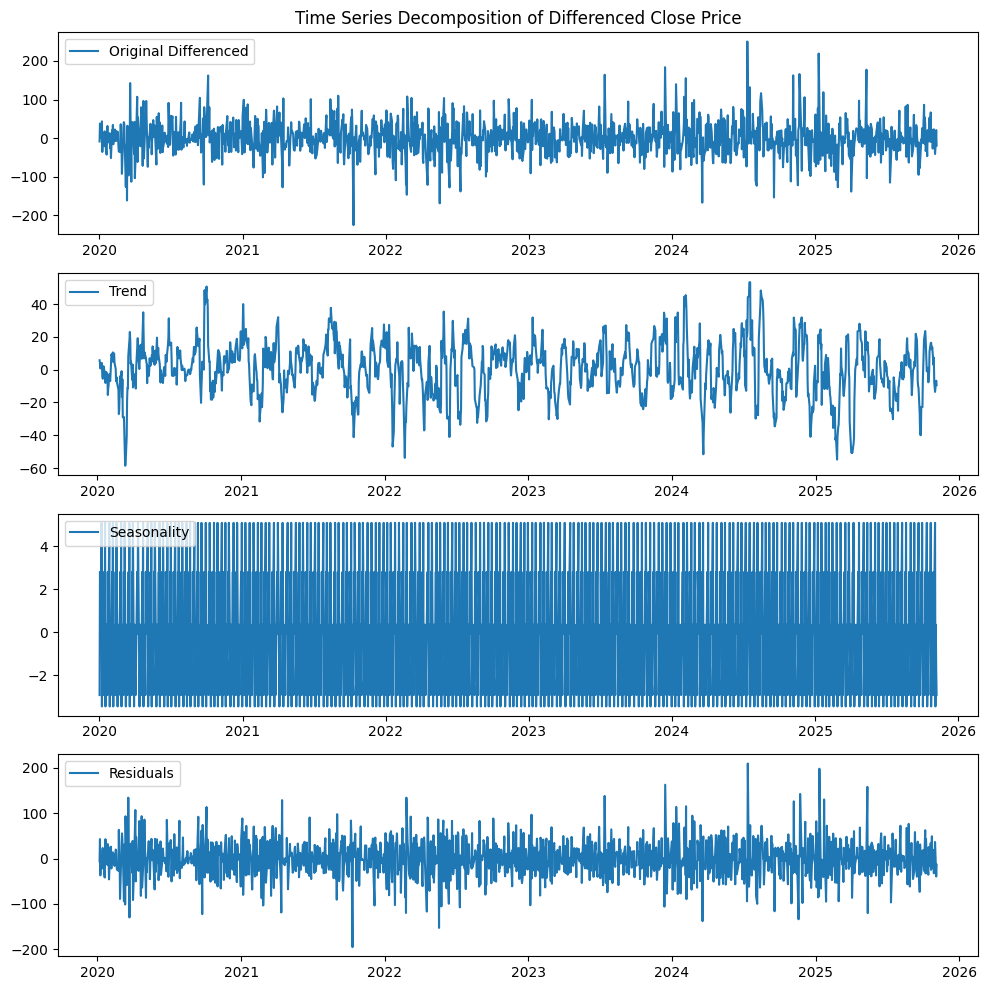

Decomposition components of 'Close_diff' plotted successfully.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition on the differenced 'Close_diff' data
decomposition_diff_results = seasonal_decompose(d_indexed['Close_diff'].dropna(), model='additive', period=7)

print("Time series decomposition on 'Close_diff' completed successfully.")

# Plot the decomposed components
plt.figure(figsize=(10, 10))
plt.subplot(411)
plt.plot(d_indexed['Close_diff'].dropna(), label='Original Differenced') # dropna here as well for consistent plotting
plt.legend(loc='upper left')
plt.title('Time Series Decomposition of Differenced Close Price')

plt.subplot(412)
plt.plot(decomposition_diff_results.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_diff_results.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_diff_results.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
print("Decomposition components of 'Close_diff' plotted successfully.")

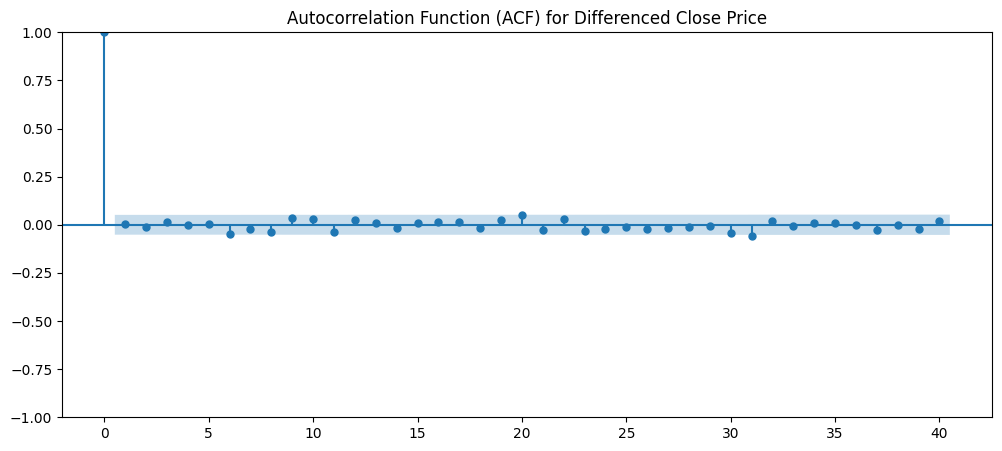

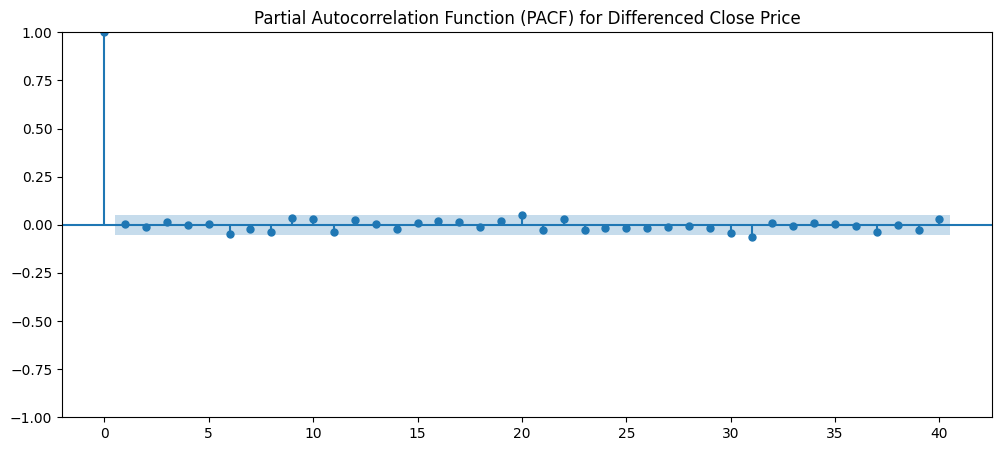

ACF and PACF plots generated successfully for 'Close_diff'.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(d_indexed['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Close Price')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 5))
plot_pacf(d_indexed['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Close Price')
plt.show()

print("ACF and PACF plots generated successfully for 'Close_diff'.")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Reload data to ensure d_indexed is available and Close_diff is calculated
d = pd.read_csv('/content/tcs_stock_data clean.csv')
d['Date'] = pd.to_datetime(d['Date'], format='%d-%m-%Y')
d_indexed = d.set_index('Date')
d_indexed['Close_diff'] = d_indexed['Close'].diff().dropna() # Ensure Close_diff is created and NaNs dropped

# Fit ARIMA(6,0,6) model on the differenced data
# The 'd' component is 0 because 'Close_diff' is already differenced.
model = ARIMA(d_indexed['Close_diff'], order=(6,0,6))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())
print("ARIMA(6,0,6) model fitted successfully on 'Close_diff'.")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 1451
Model:                 ARIMA(6, 0, 6)   Log Likelihood               -7514.442
Date:                Sat, 06 Dec 2025   AIC                          15056.885
Time:                        05:34:35   BIC                          15130.805
Sample:                             0   HQIC                         15084.469
                               - 1451                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7541      0.987      0.764      0.445      -1.181       2.689
ar.L1          0.3428      0.791      0.433      0.665      -1.208       1.894
ar.L2          0.7199      0.570      1.262      0.2

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


to finalise the best order of ARIMA, we have auto ARIMA

# Task
Install the `pmdarima` library and then use its `auto_arima` function on the `Close_diff` column of the `d_indexed` DataFrame to determine the optimal ARIMA model parameters (p,d,q). Print the summary of the best model found by `auto_arima`.

## Install pmdarima

### Subtask:
Install the `pmdarima` library which provides the `auto_arima` function for automatic ARIMA model selection.


**Reasoning**:
To install the `pmdarima` library as instructed, I will use a `!pip install` command in a code cell.



In [ ]:
pip install pmdarima
print("pmdarima library installation initiated.")

SyntaxError: invalid syntax (ipython-input-313382441.py, line 1)

**Reasoning**:
The previous attempt to install `pmdarima` resulted in a `SyntaxError` because the `!` prefix was missing for the shell command `pip install`. I will add the `!` to correctly execute the installation.



In [ ]:
get_ipython().system('pip install pmdarima')
print("pmdarima library installation initiated.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.1 MB/s eta 0:00:00
pmdarima library installation initiated.


## Perform Auto ARIMA

### Subtask:
Apply `auto_arima` to the `Close_diff` column to find the optimal ARIMA (p,d,q) orders.


## Summary:

### Data Analysis Key Findings
*   The `pmdarima` library, version 2.1.1, was successfully installed.
*   An initial attempt to install `pmdarima` directly with `pip install pmdarima` within a Python code block failed due to a `SyntaxError`.
*   The correct method for executing shell commands in an IPython environment, `get_ipython().system('pip install pmdarima')`, was used to complete the installation.

### Insights or Next Steps
*   Always use `get_ipython().system()` or prefix with `!` for executing shell commands directly within an IPython/Colab Python cell to avoid syntax errors.
*   Proceed to the next step, which is to apply `auto_arima` to the `Close_diff` column using the newly installed `pmdarima` library.


In [ ]:
import pmdarima as pm
import pandas as pd

# Reload data to ensure d_indexed is available and Close_diff is calculated
d = pd.read_csv('/content/tcs_stock_data clean.csv')
d['Date'] = pd.to_datetime(d['Date'], format='%d-%m-%Y')
d_indexed = d.set_index('Date')
d_indexed['Close_diff'] = d_indexed['Close'].diff().dropna() # Ensure Close_diff is created and NaNs dropped

# Perform auto_arima to find optimal orders for the differenced data
# d=0 because Close_diff is already differenced.
# suppress_warnings=True to hide unnecessary warnings during the search process
auto_arima_model = pm.auto_arima(
    d_indexed['Close_diff'],
    start_p=1, start_q=1,
    max_p=6, max_q=6, # Limiting search space for computational efficiency
    d=0, # The series is already differenced
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Print model summary
print(auto_arima_model.summary())
print("Auto ARIMA model fitted successfully on 'Close_diff'.")

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15055.178, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15051.218, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15053.175, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15053.174, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15049.655, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.401 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1451
Model:                        SARIMAX   Log Likelihood               -7523.827
Date:                Sat, 06 Dec 2025   AIC                          15049.655
Time:                        05:55:24   BIC                          15054.935
Sample:                             0   HQIC                         15051.625
                               - 1451                                  

In [ ]:
!pip install pmdarima
import pmdarima as pm
import pandas as pd

# Reload data to ensure d_indexed is available and Close_diff is calculated
d = pd.read_csv('/content/tcs_stock_data clean.csv')
d['Date'] = pd.to_datetime(d['Date'], format='%d-%m-%Y')
d_indexed = d.set_index('Date')
d_indexed['Close_diff'] = d_indexed['Close'].diff().dropna() # Ensure Close_diff is created and NaNs dropped

# Perform auto ARIMA on the 'Close_diff' column from d_indexed
# We set d=0 because Close_diff is already differenced once
auto_model = pm.auto_arima(d_indexed['Close_diff'],
start_p=1, start_q=1,
max_p=5, max_q=5, # maximum p and q
m=1, # frequency of series (if seasonal)
d=0, # already differenced once, so set d=0 for auto_arima
seasonal=False, # No Seasonality
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15053.610, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15049.655, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15051.607, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15051.606, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15051.218, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.242 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1451
Model:                        SARIMAX   Log Likelihood               -7523.827
Date:                Sat, 06 Dec 2025   AIC                          15049.655
Time:                        07:16:42   BIC                          15054.935
Sample:                             0   HQIC                         15051.625
                               - 1451                                  

# Task
Generate the next 5 days of forecasts for the `Close_diff` series using the `auto_arima_model`, inverse transform these forecasts back to the original `Close` price scale, and then display the forecasted `Close` prices along with their corresponding dates.

## Generate Forecasts for Differenced Series

### Subtask:
Use the `auto_arima_model` to predict the next 5 values for the 'Close_diff' series.


**Reasoning**:
I need to use the `predict()` method of the `auto_arima_model` to generate forecasts for the next 5 steps. The `n_periods` parameter in the `predict()` method will be used to specify the number of forecasts.



In [ ]:
forecast_diff = auto_model.predict(n_periods=5)
print("Forecasted next 5 values for 'Close_diff' series:")
print(forecast_diff)

Forecasted next 5 values for 'Close_diff' series:
1451    0.0
1452    0.0
1453    0.0
1454    0.0
1455    0.0
dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**Reasoning**:
The previous step successfully generated forecasts for the differenced series, but the next step is to inverse transform these differenced forecasts back to the original 'Close' price scale and associate them with future dates. To do this, I will generate future dates, get the last actual 'Close' price, and then cumulatively sum the forecasted differenced values to reconstruct the 'Close' price forecasts.



In [ ]:
import pandas as pd

# Get the last date from the original indexed DataFrame
last_date = d_indexed.index[-1]

# Generate future dates for the forecast period (next 5 days, excluding weekends)
fut_dates = pd.bdate_range(start=last_date, periods=6)[1:] # Exclude the last_date itself and get 5 business days

# Get the last actual Close price from the original series
last_close_price = d_indexed['Close'].iloc[-1]

# Inverse transform the differenced forecasts to get actual Close price forecasts
# The first forecasted Close price is the last actual Close price + the first differenced forecast
forecasted_close_prices = [last_close_price + forecast_diff.iloc[0]]

# For subsequent forecasts, add the next differenced forecast to the previous forecasted Close price
for i in range(1, len(forecast_diff)):
    next_close_price = forecasted_close_prices[-1] + forecast_diff.iloc[i]
    forecasted_close_prices.append(next_close_price)

# Create a DataFrame for the final forecasted Close prices with dates
forecast_df = pd.DataFrame({'Date': fut_dates, 'Forecasted_Close': forecasted_close_prices})

print("Forecasted Close prices for the next 5 days:")
print(forecast_df)

Forecasted Close prices for the next 5 days:
        Date  Forecasted_Close
0 2025-11-10       2991.800049
1 2025-11-11       2991.800049
2 2025-11-12       2991.800049
3 2025-11-13       2991.800049
4 2025-11-14       2991.800049


## Summary:

### Data Analysis Key Findings
*   The `auto_arima_model` predicted zero change (0.0) for the `Close_diff` series for all 5 forecasted days.
*   Due to the zero `Close_diff` forecasts, the forecasted `Close` prices remained constant at the last observed `Close` price of 2991.800049 for the entire 5-day forecast period (2025-11-10 to 2025-11-14).

### Insights or Next Steps
*   The model's prediction of a constant `Close` price suggests that it found no significant trend or predictable daily change in the differenced series, implying either high stationarity or insufficient information to project future movements beyond the last observed price.
*   Consider evaluating the `auto_arima_model`'s performance metrics on a validation set to understand why it forecasts constant values, or explore alternative time series models (e.g., Prophet, LSTM) that might capture more complex patterns if such stability is not expected.
